## **<span style="color:Green">Exercise </span>**


1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv(r"F:\Machine Learning all Algorithms\7 Logistic Regression\Binary Classification\HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### **Exploratory Data Analysis and Visualizations**

In [3]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [4]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
left=df[df['left']==1]
left.shape

(3571, 10)

In [7]:
retained=df[df['left']==0]
retained.shape

(11428, 10)

#### Average for all columns

In [8]:
# Exclude non numeric columns
df_numeric=df.select_dtypes(include=['number'])

In [9]:
# Group by 'left' and compute the mean for numeric columns
df_numeric.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


**From above we can conclude**
1. **Satisfaction seems to be relatively low(0.44) in employees leaving the firm than the employees retained(0.66)**
2. **Average Monthly hours are higher for the employees leaving the firm(207) than the employees retained(199)**
3. **Promotion Last 5 Years, employees that were given a promotion are likely to be reatined at the firm**

### **Impact of Salary on employee retaintion**

<Figure size 800x600 with 0 Axes>

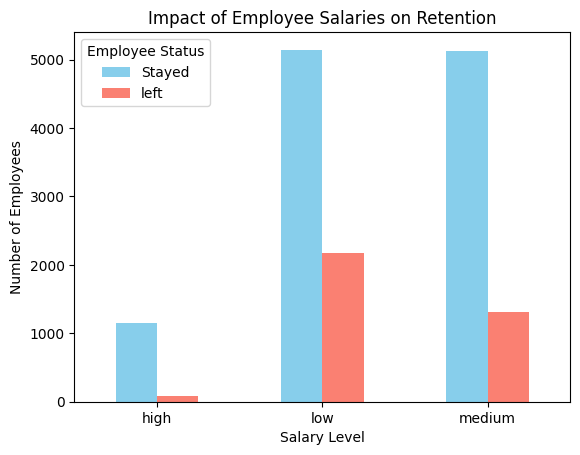

In [10]:
# Create a crosstab to count employees for each salary level and retention status
salary_retention=pd.crosstab(df['salary'], df['left'])

# Plot the bar chart
plt.figure(figsize=(8,6))
salary_retention.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Salary Level')
plt.ylabel('Number of Employees')
plt.title('Impact of Employee Salaries on Retention')
plt.xticks(rotation=0)
plt.legend(['Stayed', 'left'], title='Employee Status')
plt.show()

Above chart shows Employees with high Salaries are less likely to leave the firm

### **Department wise Employee retention rate**

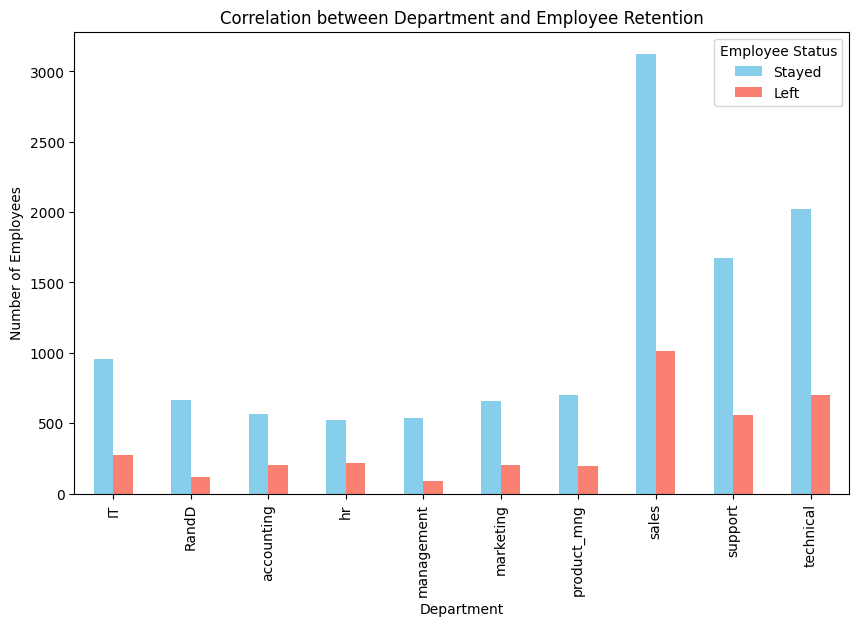

In [11]:
# Create a crosstab 
department_retention=pd.crosstab(df['Department'], df['left'])

# Plot the bar chart
department_retention.plot(kind='bar', figsize=(10,6), color=['skyblue', 'salmon'])
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=90)
plt.title('Correlation between Department and Employee Retention')
plt.legend(['Stayed', 'Left'], title='Employee Status')
plt.show()

 Above chart shows that there is not a significatnt impact of department on employee retention. Therefore, we will ignore the department in our analysis.


### **<span style="color:Purple">From the data analysis and coclusion, we will be using the following features in our model </span>**
1. Satisfaction Level
2. Average Monthly Hours
3. Promotion Last 5 Years
4. Salary

In [12]:
df.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


In [13]:
df2= df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary']]
df2.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [14]:
sal_dum=pd.get_dummies(df['salary'], prefix='salary').astype(int)
sal_dum.head()

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [15]:
final=pd.concat([df2, sal_dum], axis=1)
final

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


In [17]:
final=final.drop(['salary'], axis=1)
final

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [21]:
X=final
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [22]:
y=df['left']

In [23]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=42)

In [26]:
model=LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [29]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
model.predict_proba([[0.05, 300, 0, 0, 1, 0]])          
# If job satisfactions is 5%, work hours:300, no promotion in 5 years and salary low then 80% chance of leaving the company and 20% chance of staying

c:\Users\Nafis Ansari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.20445537, 0.79554463]])

### **Model Accuracy**

In [38]:
model.score(X_test,y_test)

0.7675555555555555